In [88]:
# Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [89]:
# Load dataset
data = pd.read_csv("../data/clean_dataset.csv")

In [90]:
data.head(10)

,TV_Total,FLYERS,Print_Total,Online_Video,Online_Display,Online_Total,TikTok,YouTube_Total,YouTube_Mobile,YouTube_Desktop,...,YouTube_CTV,Pinterest,Purchase,weight,Gender,Number_of_children,Age,Age_Group,Household_Size,Total_Media_Exposure
0,0.0,0.0,0.0,10.0,4.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,11032.10,male,0.0,28.0,18-34,2.0,14.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,1,2581.77,female,0.0,52.0,45-54,2.0,3.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1,8219.48,male,1.0,38.0,35-44,3.0,5.0
3,0.0,0.0,0.0,11.0,2.0,13.0,0.0,1.0,1.0,0.0,...,0.0,25.0,1,6040.79,male,2.0,38.0,35-44,4.0,14.0
4,0.0,0.0,0.0,7.0,3.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,11635.16,male,0.0,28.0,18-34,2.0,10.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,13456.38,female,0.0,27.0,18-34,2.0,0.0
6,4.0,0.0,0.0,6.0,5.0,11.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1,3881.71,female,0.0,38.0,35-44,1.0,16.0
7,3.0,0.0,0.0,9.0,6.0,15.0,0.0,2.0,0.0,0.0,...,0.0,3.0,1,3993.45,female,0.0,52.0,45-54,2.0,20.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,6353.90,male,0.0,91.0,75+,1.0,1.0
9,81.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,2966.01,male,0.0,69.0,65-74,2.0,82.0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048 entries, 0 to 16047
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV_Total              16048 non-null  float64
 1   FLYERS                16048 non-null  float64
 2   Print_Total           16048 non-null  float64
 3   Online_Video          16048 non-null  float64
 4   Online_Display        16048 non-null  float64
 5   Online_Total          16048 non-null  float64
 6   TikTok                16048 non-null  float64
 7   YouTube_Total         16048 non-null  float64
 8   YouTube_Mobile        16048 non-null  float64
 9   YouTube_Desktop       16048 non-null  float64
 10  YouTube_Tablet        16048 non-null  float64
 11  YouTube_CTV           16048 non-null  float64
 12  Pinterest             16048 non-null  float64
 13  Purchase              16048 non-null  int64  
 14  weight                16048 non-null  float64
 15  Gender             

In [92]:
# Listing Numerical columns
cols = data.columns
num_cols = list(data.select_dtypes('number'))

print(f"Number of numerical columns: {len(num_cols)}")
print(num_cols)

Number of numerical columns: 19
['TV_Total', 'FLYERS', 'Print_Total', 'Online_Video', 'Online_Display', 'Online_Total', 'TikTok', 'YouTube_Total', 'YouTube_Mobile', 'YouTube_Desktop', 'YouTube_Tablet', 'YouTube_CTV', 'Pinterest', 'Purchase', 'weight', 'Number_of_children', 'Age', 'Household_Size', 'Total_Media_Exposure']


In [93]:
# Listing Categorical columns
cat_cols = list(set(cols) - set(num_cols))

print(f"Number of categorical columns: {len(cat_cols)}")
print(cat_cols)

Number of categorical columns: 2
['Age_Group', 'Gender']


In [94]:
# Separating the numeric and categorical columns as each will require a separate approach
df_numeric = data[num_cols]
df_categorical = data[cat_cols]

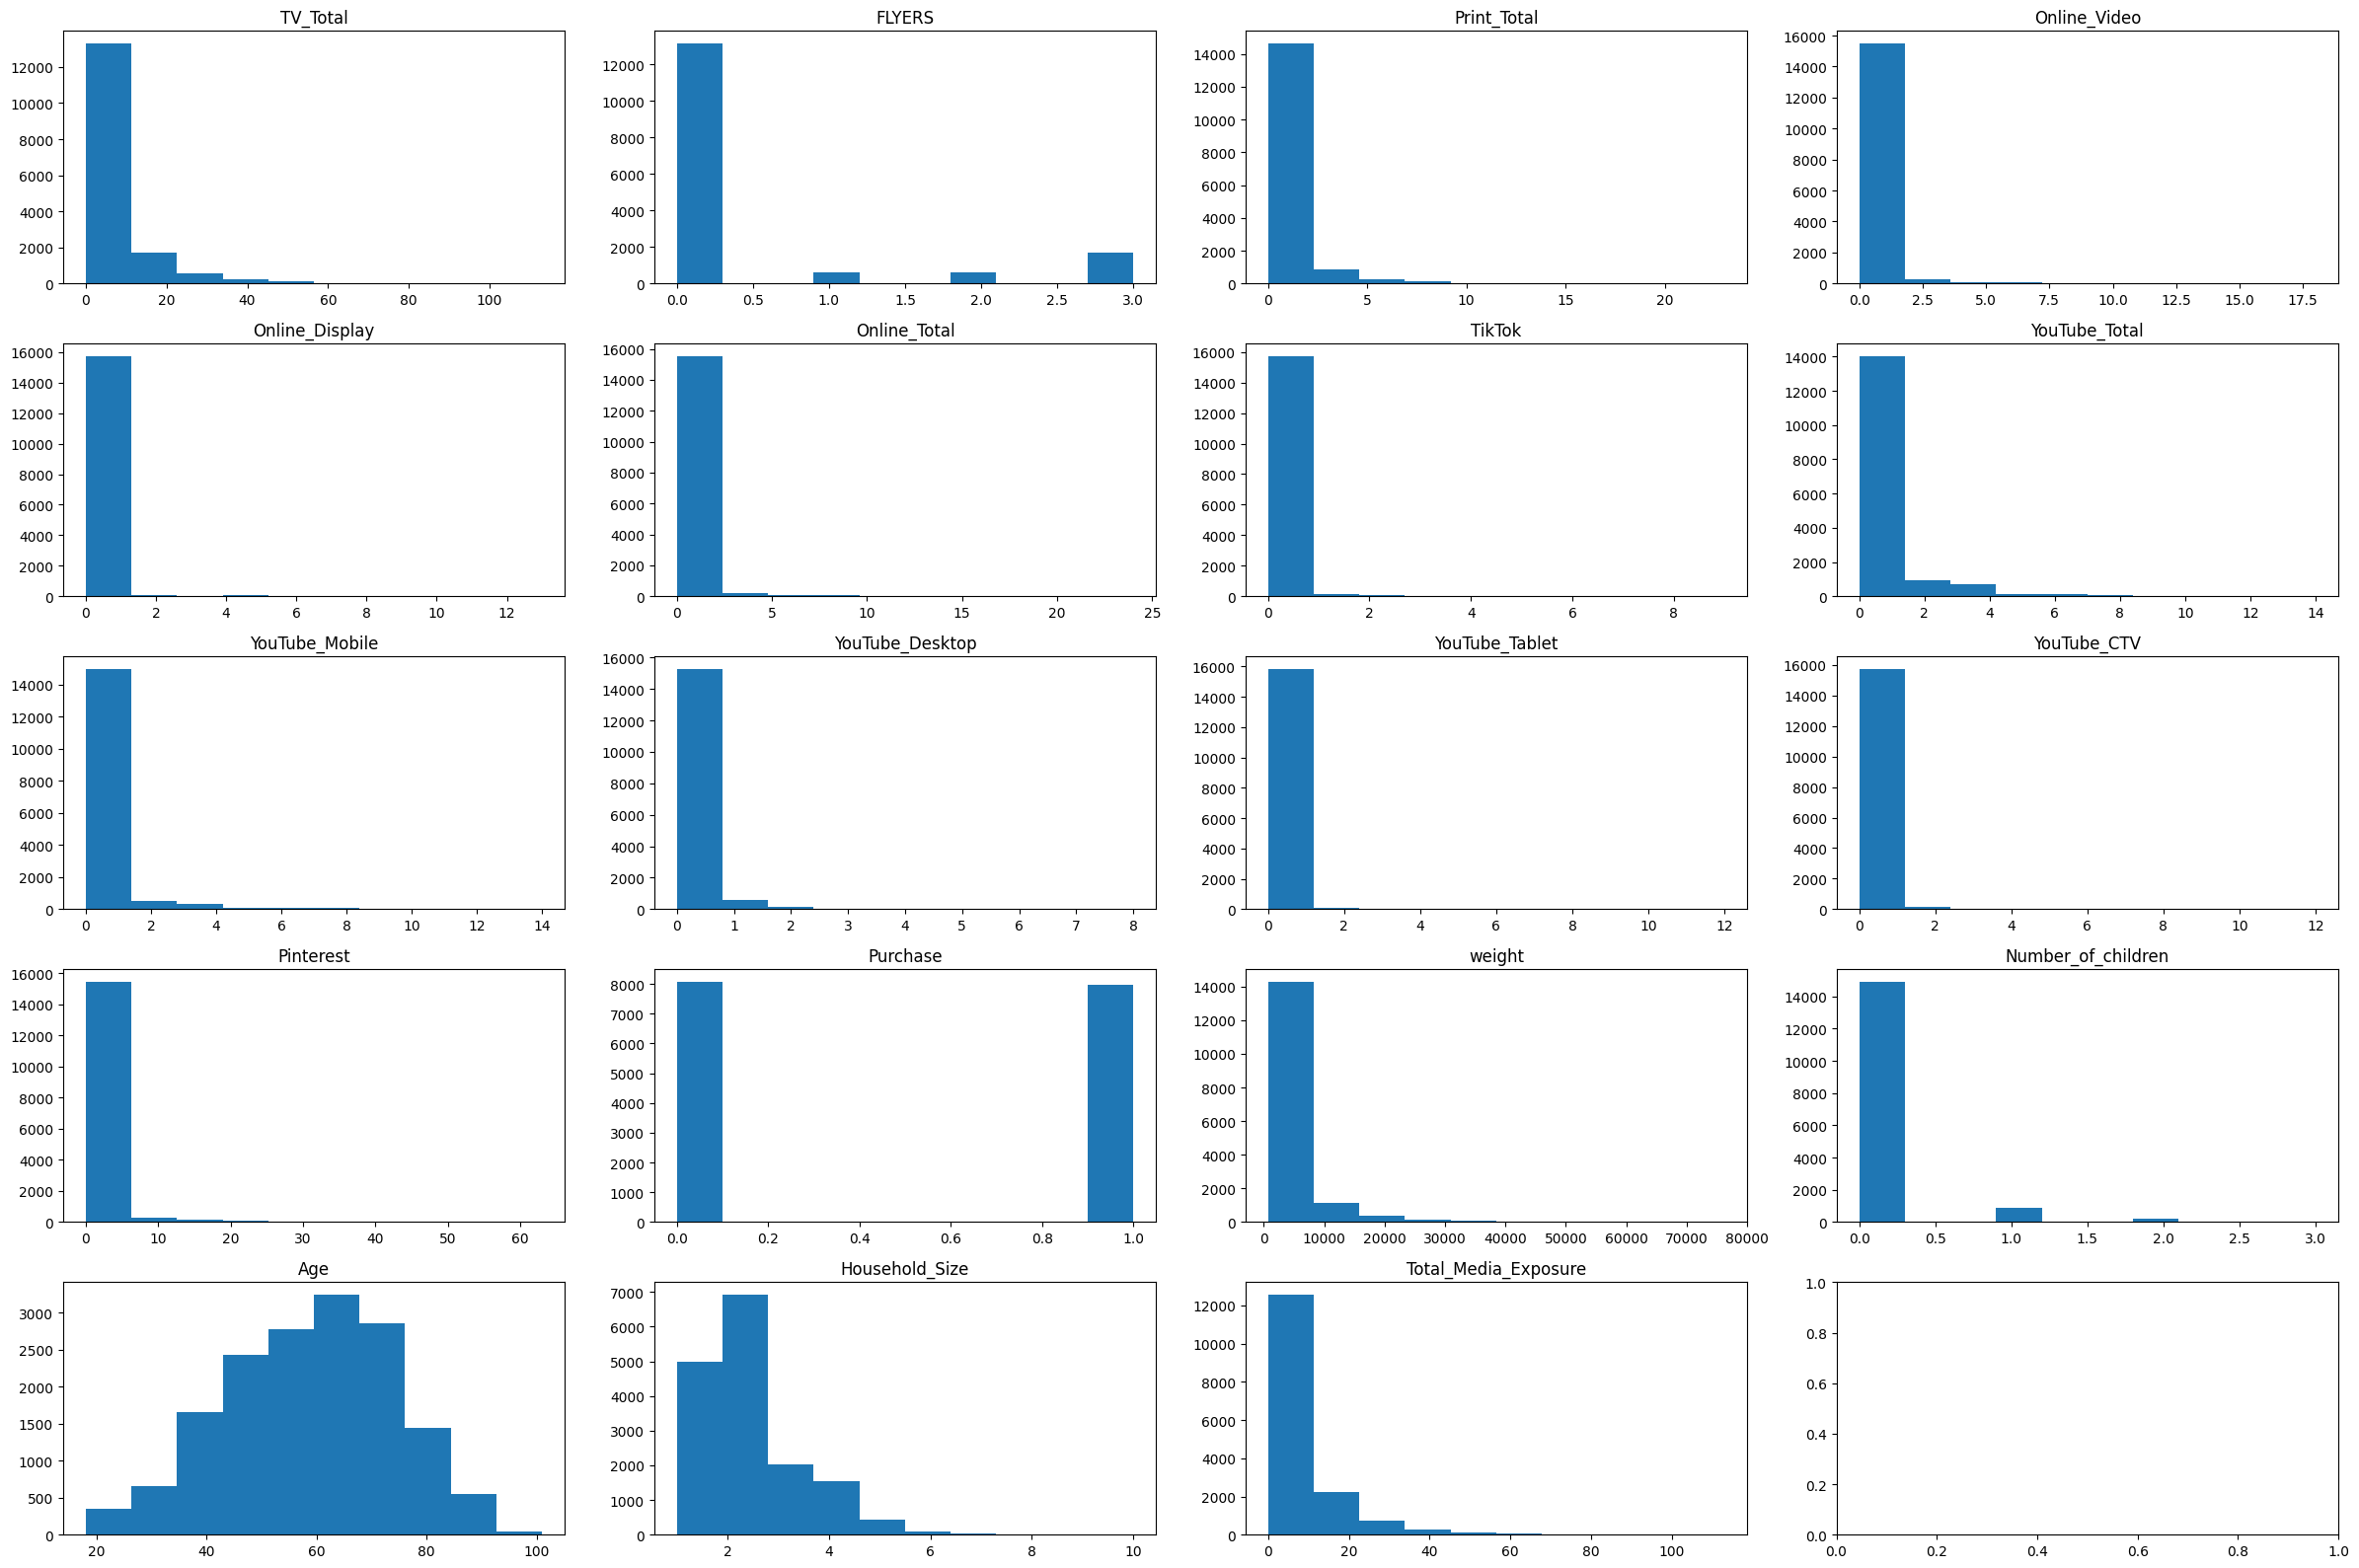

In [95]:
# Creating a grid of subplots for the numeric columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24, 16))
axes = axes.flatten()  # Flatten 2D array to 1D

# Plot each histogram in a subplot
for i, col in enumerate(df_numeric.columns):
    plt.sca(axes[i])
    plt.hist(df_numeric[col])
    plt.title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

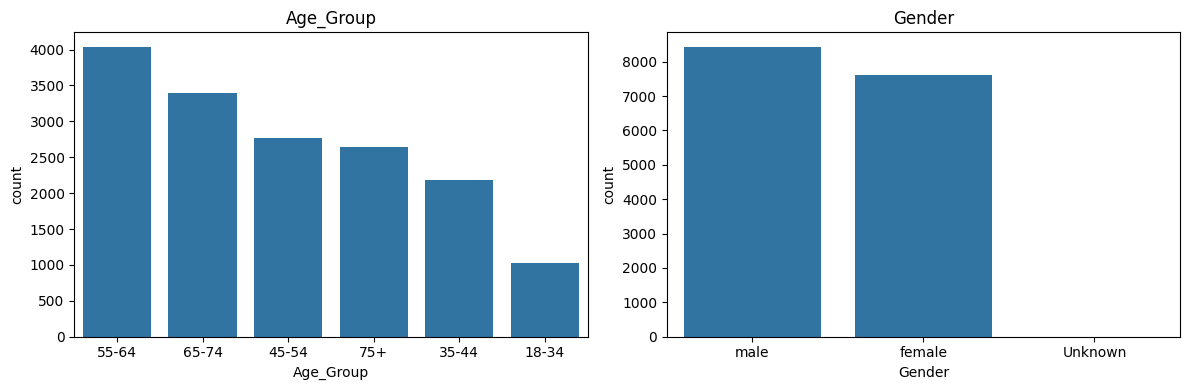

In [96]:
# Same grid of subplots as the one above but containing barplots with our categorical features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes = axes.flatten()

# Plot each barplot in a subplot
for i, col in enumerate(df_categorical.columns):
    sns.barplot(x=df_categorical[col].value_counts().index, y=df_categorical[col].value_counts(), ax=axes[i])
    axes[i].set_title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Purchase Rate: 49.59%


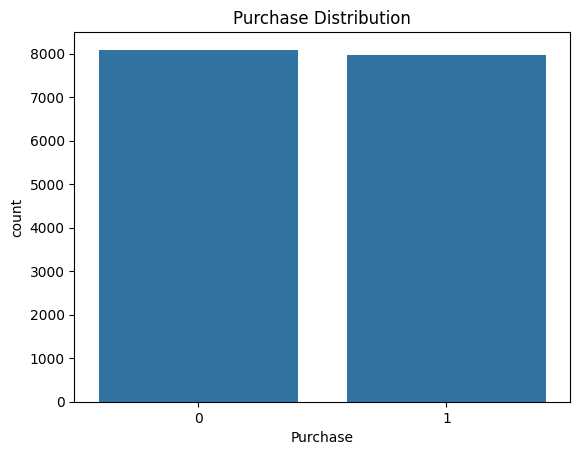

In [97]:
# Check purchase rate
purchase_rate = data['Purchase'].mean()
print(f"Purchase Rate: {purchase_rate:.2%}")

# Visualize class balance
sns.countplot(x='Purchase', data=data)
plt.title("Purchase Distribution")
plt.show()

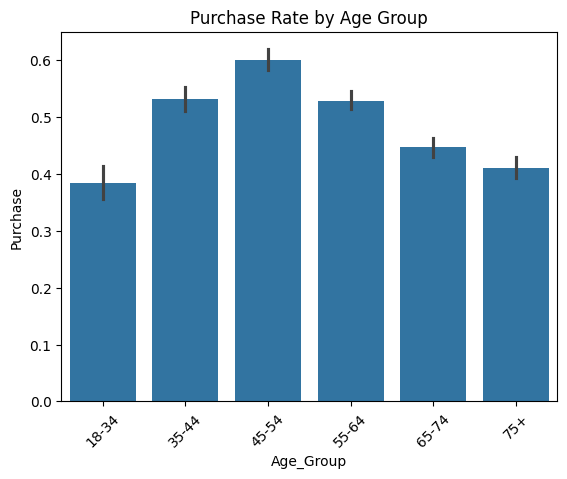

In [98]:
# Plot purchase rate by age group
age_group_order = ['18-34', '35-44', '45-54', '55-64', '65-74', '75+']

sns.barplot(x='Age_Group', y='Purchase', data=data, estimator=lambda x: sum(x)/len(x), order=age_group_order)
plt.title("Purchase Rate by Age Group")
plt.xticks(rotation=45)
plt.show()


In [99]:
# # Manually compute weighted purchase rate per age group
# weighted_purchase = (
#     data.groupby("Age_Group").apply(lambda g: np.average(g["Purchase"], weights=g["weight"]))
# ).reset_index(name="Weighted_Purchase_Rate")

# # Now plot using the precomputed values
# sns.barplot(x="Age_Group", y="Weighted_Purchase_Rate", data=weighted_purchase)
# plt.title("Weighted Purchase Rate by Age Group")
# plt.xticks(rotation=45)
# plt.show()

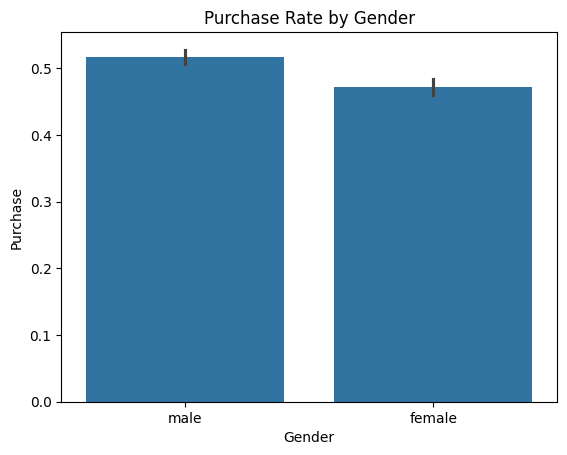

In [100]:
# Filter the data to exclude 'Unknown' gender category as there are only 3 observations
filtered_data = data[data['Gender'] != 'Unknown']

# Plot purchase rate by gender without the 'Unknown' category
sns.barplot(x='Gender', y='Purchase', data=filtered_data, estimator=lambda x: sum(x)/len(x))

plt.title("Purchase Rate by Gender")
plt.show()

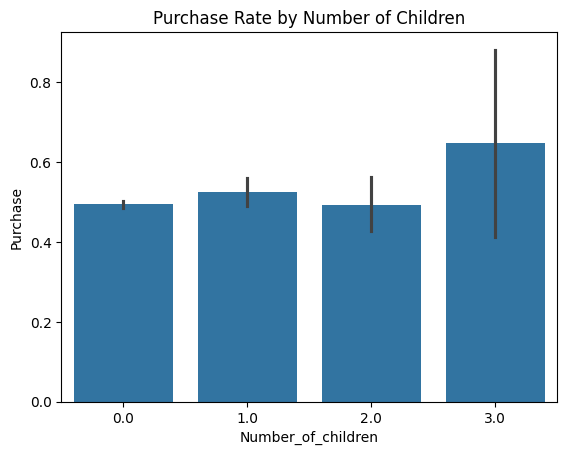

In [101]:
sns.barplot(x='Number_of_children', y='Purchase', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Number of Children")
plt.show()


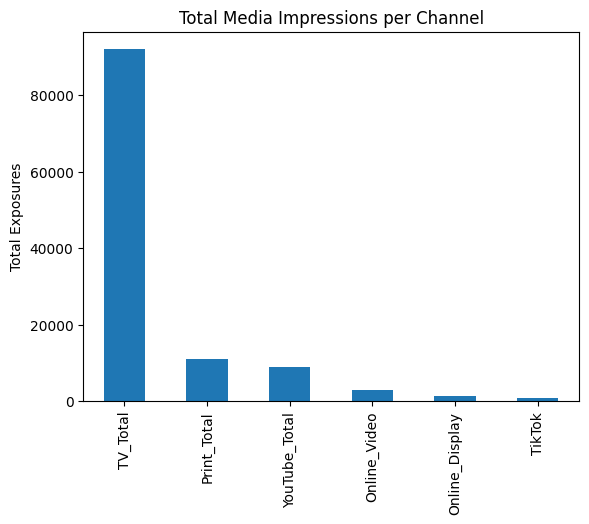

In [102]:
media_channels = ['TV_Total', 'Print_Total', 'Online_Video', 'Online_Display', 'YouTube_Total', 'TikTok']

# Sum exposure per channel
media_exposure = data[media_channels].sum().sort_values(ascending=False)

# Plot media exposure
media_exposure.plot(kind='bar')
plt.title("Total Media Impressions per Channel")
plt.ylabel("Total Exposures")
plt.show()


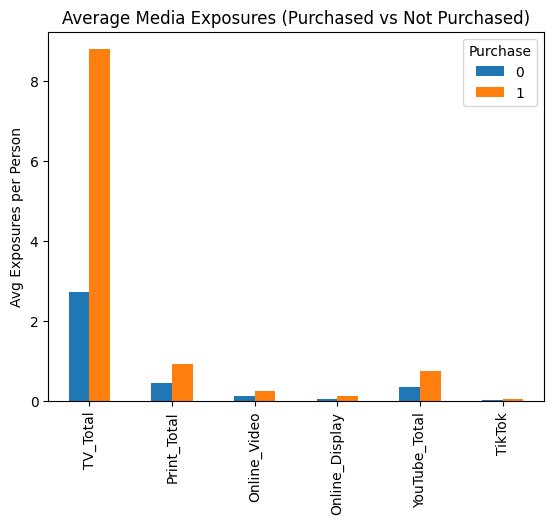

In [103]:
# Calculate average exposure for purchasers vs non-purchasers
purchase_by_channel = data.groupby('Purchase')[media_channels].mean().T
purchase_by_channel.plot(kind='bar')
plt.title("Average Media Exposures (Purchased vs Not Purchased)")
plt.ylabel("Avg Exposures per Person")
plt.show()


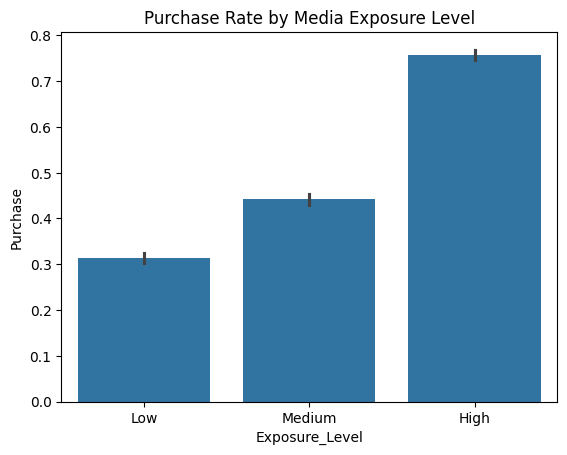

In [104]:
data['Total_Media_Exposure'] = data[media_channels].sum(axis=1)

# Bin people into Low, Medium, and High media exposure
data['Exposure_Level'] = pd.qcut(data['Total_Media_Exposure'], q=3, labels=['Low', 'Medium', 'High'])

sns.barplot(x='Exposure_Level', y='Purchase', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Media Exposure Level")
plt.show()

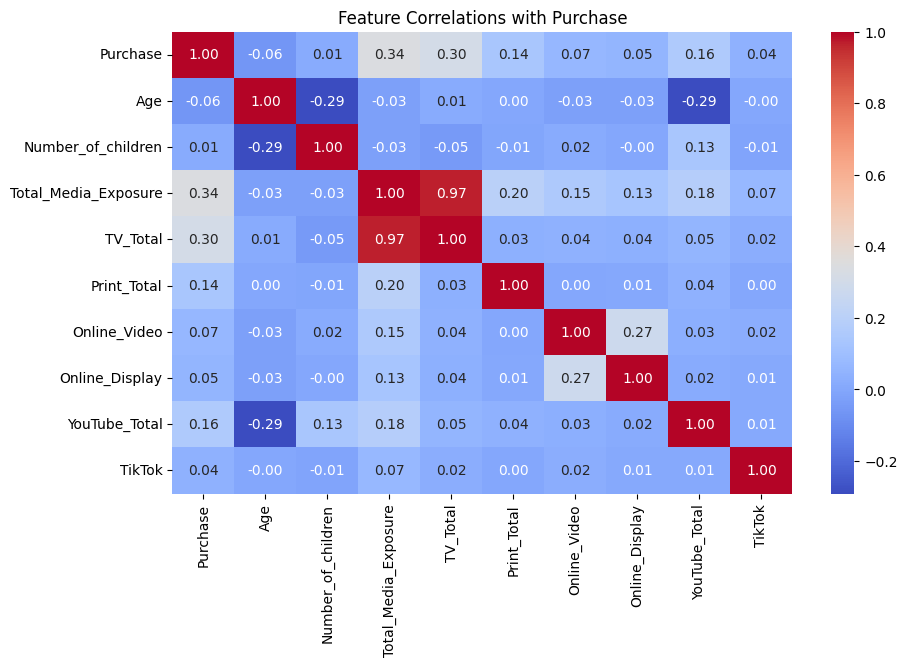

In [105]:
corr = data[['Purchase', 'Age', 'Number_of_children', 'Total_Media_Exposure'] + media_channels].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations with Purchase")
plt.show()

In [106]:
purchase_rate_by_age = data.groupby("Age")["Purchase"].mean()
purchase_rate_by_gender = data.groupby("Gender")["Purchase"].mean()
purchase_rate_by_household = data.groupby("Household_Size")["Purchase"].mean()

In [107]:
purchase_rate_by_age

Age
18.0     0.130435
19.0     0.071429
20.0     0.341463
21.0     0.288889
22.0     0.229167
           ...   
97.0     0.500000
98.0     0.333333
99.0     0.000000
100.0    0.000000
101.0    0.000000
Name: Purchase, Length: 84, dtype: float64

In [108]:
purchase_rate_by_gender

Gender
Unknown    0.666667
female     0.472025
male       0.517495
Name: Purchase, dtype: float64

In [109]:
purchase_rate_by_household

Household_Size
1.0     0.493874
2.0     0.483922
3.0     0.515924
4.0     0.515524
5.0     0.544601
6.0     0.500000
7.0     0.560000
8.0     0.500000
9.0     1.000000
10.0    0.000000
Name: Purchase, dtype: float64

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048 entries, 0 to 16047
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   TV_Total              16048 non-null  float64 
 1   FLYERS                16048 non-null  float64 
 2   Print_Total           16048 non-null  float64 
 3   Online_Video          16048 non-null  float64 
 4   Online_Display        16048 non-null  float64 
 5   Online_Total          16048 non-null  float64 
 6   TikTok                16048 non-null  float64 
 7   YouTube_Total         16048 non-null  float64 
 8   YouTube_Mobile        16048 non-null  float64 
 9   YouTube_Desktop       16048 non-null  float64 
 10  YouTube_Tablet        16048 non-null  float64 
 11  YouTube_CTV           16048 non-null  float64 
 12  Pinterest             16048 non-null  float64 
 13  Purchase              16048 non-null  int64   
 14  weight                16048 non-null  float64 
 15  Ge